In [773]:
import sys
import pickle

# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [774]:
#Reading Data
with open("final_project_dataset_unix.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
lis=list(data_dict.keys())
for i in lis:
    print(i)

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HAEDICKE MARK E
PIPER GREGORY F
HUMPHREY GENE E
NOLES JAMES L
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUCE
LINDHOLM TOD A
M

In [775]:
dataset = pd.DataFrame.from_dict(data_dict, orient='index')
dataset['Name']=list(data_dict.keys())
dataset.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,Name
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1740,1,False,NaN,702,585062,NaN,METTS MARK
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN,BAXTER JOHN C
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN,ELLIOTT STEVEN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,NaN,0,False,NaN,58,386335,NaN,CORDES WILLIAM R
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,11350,21,True,1617011,1035,853064,NaN,HANNON KEVIN P


In [776]:
## Checking the feature data type:
features_to_check = []
for col in dataset.columns:
    datatype = type(dataset[col][0])
    ## Here we select those attributes which have string type data:
    if datatype is str:
        features_to_check.append(col)

In [777]:
#These attribute type is originally (str type). However, it was expected to have financial values.
dataset['loan_advances'].unique()
dataset['director_fees'].unique()

array(['NaN', 98784, 3285, 36666, 103750, 109298, 17500, 102492, 112492,
       38346, 101250, 113784, 1398517, 108750, 108579, 137864, 125034,
       119292], dtype=object)

In [778]:
dataset[dataset['loan_advances']!='NaN']
dataset[dataset['director_fees']!='NaN']

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,Name
CHAN RONNIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32460,-98784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,32460,98784,CHAN RONNIE
BELFER ROBERT,NaN,NaN,-102500,102500,NaN,NaN,NaN,44093,NaN,-44093,NaN,NaN,3285,NaN,NaN,NaN,False,NaN,NaN,NaN,3285,BELFER ROBERT
URQUHART JOHN A,NaN,NaN,NaN,228656,NaN,NaN,NaN,NaN,-36666,NaN,228656,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,36666,URQUHART JOHN A
MENDELSOHN JOHN,NaN,NaN,NaN,148,NaN,NaN,NaN,NaN,-103750,NaN,148,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,103750,MENDELSOHN JOHN
WAKEHAM JOHN,NaN,NaN,NaN,213071,NaN,NaN,NaN,NaN,NaN,NaN,103773,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,109298,WAKEHAM JOHN
POWERS WILLIAM,NaN,653,NaN,NaN,NaN,NaN,ken.powers@enron.com,NaN,-17500,NaN,NaN,0,NaN,26,NaN,0,False,NaN,12,NaN,17500,POWERS WILLIAM
DUNCAN JOHN H,NaN,NaN,NaN,77492,NaN,NaN,NaN,NaN,-25000,371750,NaN,NaN,371750,NaN,NaN,NaN,False,NaN,NaN,NaN,102492,DUNCAN JOHN H
LEMAISTRE CHARLES,NaN,NaN,NaN,87492,NaN,NaN,NaN,NaN,-25000,412878,NaN,NaN,412878,NaN,NaN,NaN,False,NaN,NaN,NaN,112492,LEMAISTRE CHARLES
MEYER JEROME J,NaN,NaN,NaN,2151,NaN,NaN,NaN,NaN,-38346,NaN,2151,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,38346,MEYER JEROME J
PEREIRA PAULO V. FERRAZ,NaN,NaN,NaN,27942,NaN,NaN,NaN,NaN,-101250,NaN,27942,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,101250,PEREIRA PAULO V. FERRAZ


In [779]:
#Converting string "NaN" to numpy.NaN
for column in dataset.columns:
    dataset[column] = dataset[column].apply(lambda x: np.NaN if x == 'NaN' else x)

In [780]:
## Checking the dataset information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [781]:
#Counting valid data
notNullDataset = dataset.dropna(thresh=15)
notNullDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     65 non-null     float64
 1   to_messages                63 non-null     float64
 2   deferral_payments          18 non-null     float64
 3   total_payments             65 non-null     float64
 4   loan_advances              4 non-null      float64
 5   bonus                      61 non-null     float64
 6   email_address              64 non-null     object 
 7   restricted_stock_deferred  8 non-null      float64
 8   deferred_income            27 non-null     float64
 9   total_stock_value          64 non-null     float64
 10  expenses                   56 non-null     float64
 11  from_poi_to_this_person    63 non-null     float64
 12  exercised_stock_options    54 non-null     float64
 13  from_messages              63 non-n

In [782]:
## Only numerical features are being considered here
financialFeatures = ['salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
                     'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive']

behavioralFeatures = ['to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']

allFeatures = ['poi','salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
               'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive',
               'to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']

In [783]:
dataset.fillna(0,inplace=True)

In [784]:
#Function for visualisation
def visualizeFeat(series, figsize):
    ''' series = pandas.series, which can be inputed as "dataframe['feature']
        figsize = (width,length)'''
    fig, axes = plt.subplots(2,1,figsize=figsize, sharex=True)
    series.plot(kind='kde', ax=axes[0])
    sns.boxplot(x=series, ax=axes[1])
    plt.xlim(series.min(), series.max()*1.1)
    return
def visualize3Feats(dataset, features):
    '''Shows the distribution and the boxplot for the given features of a pandas.Dataframe:
        dataset = pandas dataframe.
        features = list of features of interest'''
    ## Building the Figure:
    fig, axes = plt.subplots(2,3,figsize=(15,6), sharex=False)
    for col, feat in enumerate(features):
        dataset[feat].plot(kind='kde', ax=axes[0,col])
        sns.boxplot(x=dataset[feat], ax=axes[1,col])
        axes[0,col].set_xlim(dataset[feat].min(), dataset[feat].max()*1.1)
        axes[1,col].set_xlim(dataset[feat].min(), dataset[feat].max()*1.1)
    return

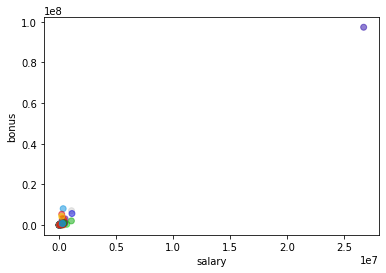

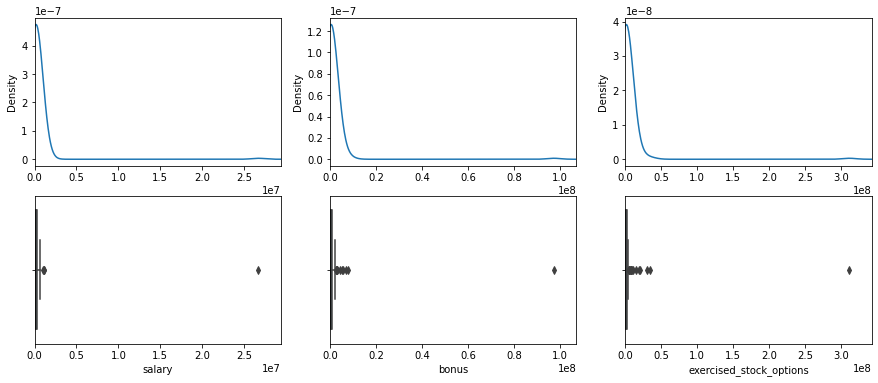

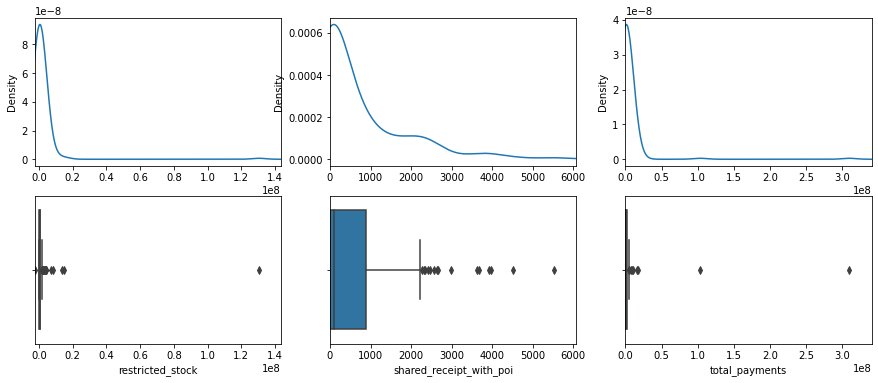

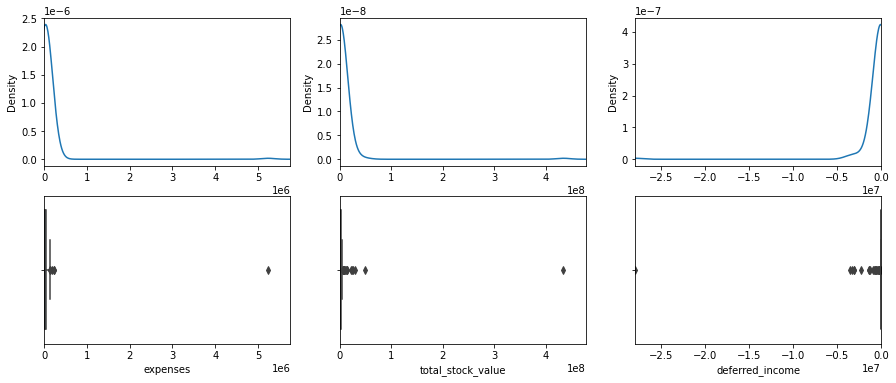

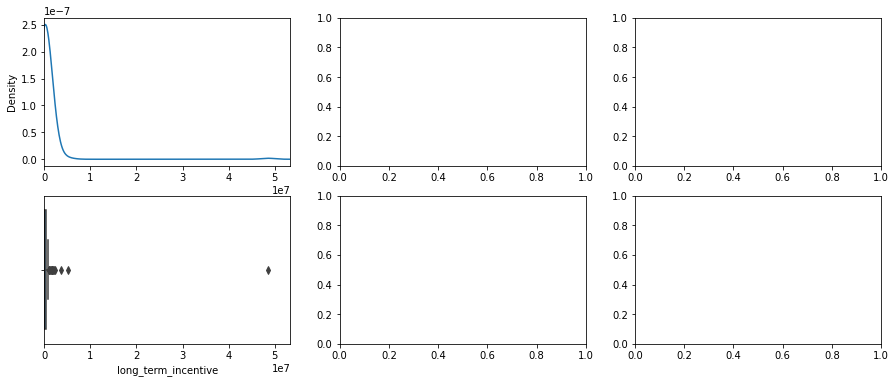

In [785]:
### Visualizing financial features:
colors = np.random.randint(146, size=(146))
plt.scatter(dataset[financialFeatures[0]],dataset[financialFeatures[1]], c=colors, alpha=0.5, cmap='nipy_spectral')
plt.xlabel(financialFeatures[0])
plt.ylabel(financialFeatures[1])
numPlots = int(np.ceil(len(financialFeatures)/3.))
for i in range(numPlots):
    shift = i*3
    visualize3Feats(dataset,financialFeatures[0+shift:3+shift])

In [786]:
#Finding Outlier Name
max=0
name=""
k=0
l1=list(dataset['Name'])
l=list(dataset[financialFeatures[0]])
for i in l:
     if(i>max):
        max=i
        name=l1[k]
     k+=1
print("Name: ",name," Value: ",max)

Name:  TOTAL  Value:  26704229.0


In [787]:
#Removing the anomalous instance TOTAL (Outlier)
dataset.drop('TOTAL',inplace=True)  

In [788]:
## Counting gender classes
dataset['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

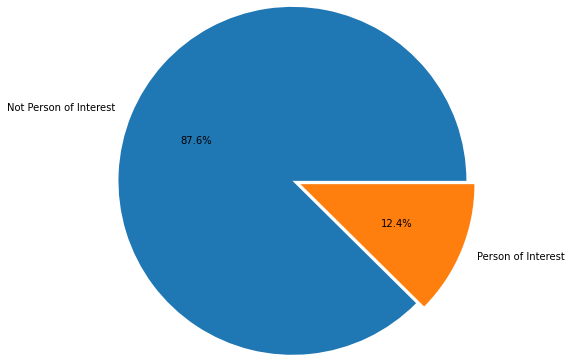

In [789]:
#Pie Chart
ct=[]
ct.append(list(dataset['poi']).count(0))
ct.append(list(dataset['poi']).count(1))
agent=['Not Person of Interest','Person of Interest']
plt.pie(ct,labels=agent,explode=(0.05,0.05),radius=2,autopct='%1.1f%%')
plt.show()

Text(0, 0.5, 'bonus')

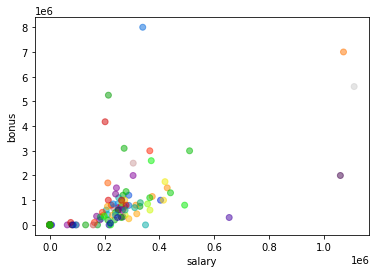

In [805]:
#scatter
colors = np.random.randint(145, size=(145))
plt.scatter(dataset[financialFeatures[0]],dataset[financialFeatures[1]], c=colors, alpha=0.5, cmap='nipy_spectral')
plt.xlabel(financialFeatures[0])
plt.ylabel(financialFeatures[1])

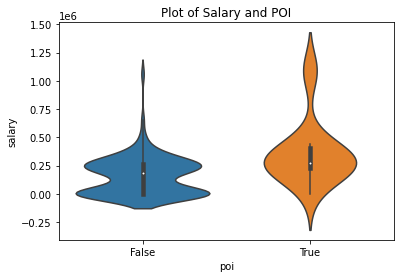

In [790]:
#Violen Plot
sns.violinplot(y=dataset['salary'],x=dataset['poi'])
plt.title("Plot of Salary and POI")
plt.show()

In [791]:
#Splitting data into test train for feature selection
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['poi'])

In [792]:
## Converting boolean data into int:
dataset['poi'] = dataset['poi'].apply(lambda x: int(x))
trainData['poi'] = trainData['poi'].apply(lambda x: int(x))
testData['poi'] = testData['poi'].apply(lambda x: int(x))

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:title={'center':'Test subset'}, ylabel='Frequency'>

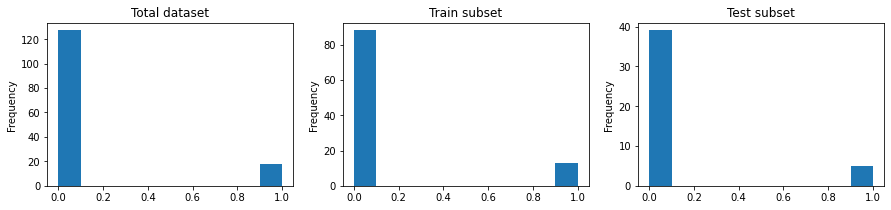

In [793]:
## Evaluating the class distribution:
fig2, axes2 = plt.subplots(1,3,figsize=(15,3), sharex=False)
dataset['poi'].plot(kind='hist', ax=axes2[0], title='Total dataset')
trainData['poi'].plot(kind='hist', ax=axes2[1], title='Train subset')
testData['poi'].plot(kind='hist', ax=axes2[2], title='Test subset')

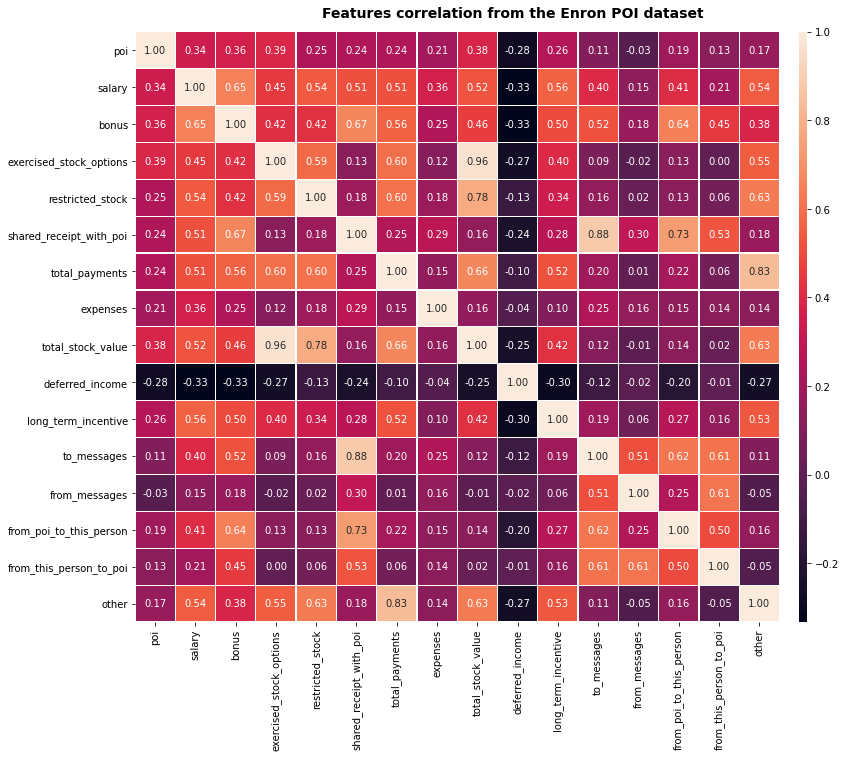

In [794]:
#Verifying correlation among features
## Calculating the correlation among features by Pearson method
correlationDataframe = dataset[allFeatures].corr()

# Drawing a heatmap with the numeric values in each cell
fig1, ax = plt.subplots(figsize=(14,10))
fig1.subplots_adjust(top=.945)
plt.suptitle('Features correlation from the Enron POI dataset', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.025, 'aspect':70}
sns.heatmap(correlationDataframe, annot=True, fmt='.2f', linewidths=.3, ax=ax, cbar_kws=cbar_kws)

In [795]:
# Applying PCA on correlated features to generate a new one
from sklearn.decomposition import PCA
## Listing the financial features
financialFeatures

['salary',
 'bonus',
 'exercised_stock_options',
 'restricted_stock',
 'shared_receipt_with_poi',
 'total_payments',
 'expenses',
 'total_stock_value',
 'deferred_income',
 'long_term_incentive']

In [798]:
## Defining only one resulting component:
pca = PCA(n_components=1)
pca.fit(dataset[financialFeatures])
for i in pca.explained_variance_ratio_:
    print(i)

0.8023715051831324


In [800]:
pcaComponents = pca.fit_transform(dataset[financialFeatures])
dataset['financial'] = pcaComponents

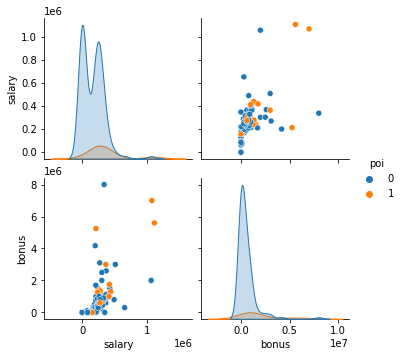

In [682]:
sns.pairplot(dataset,hue='poi',vars=['salary','bonus'], diag_kind='kde')

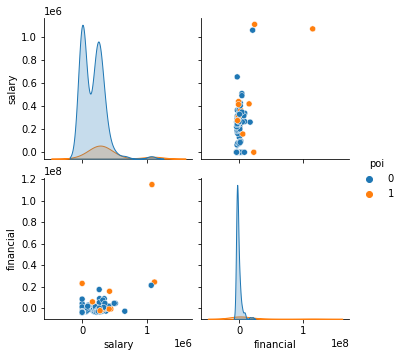

In [683]:
sns.pairplot(dataset,hue='poi',vars=['salary','financial'], diag_kind='kde')

In [684]:
## Adding up the new 'financial' feature to the 'allFeatures' list:
allFeatures.append('financial')
financialFeatures.append('financial')

In [685]:
from sklearn.feature_selection import SelectPercentile, f_classif

selectorDataset = dataset[financialFeatures]
selectorLabel = dataset['poi']
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 5% most significant features
selector = SelectPercentile(f_classif, percentile=5)
selector.fit(selectorDataset, selectorLabel)

SelectPercentile(percentile=5)

<BarContainer object of 11 artists>

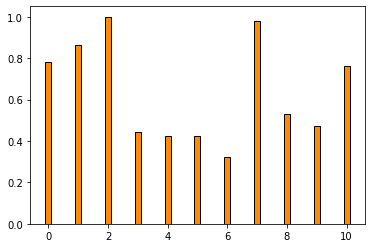

In [686]:
## Plotting the features selection: 
X_indices = np.arange(selectorDataset.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [687]:
len(scores)

11

In [688]:
## Printing out the selected financial features: 
selectedFeatures = ['poi'] 
for ix, pval in enumerate(scores):
    print(financialFeatures[ix],': ',pval)
    if (pval >= 0.45):
        selectedFeatures.append(financialFeatures[ix])

salary :  0.7818686344960931
bonus :  0.8657013901313363
exercised_stock_options :  1.0
restricted_stock :  0.4447590111988349
shared_receipt_with_poi :  0.4228079784855426
total_payments :  0.42525219924626906
expenses :  0.32408364888457886
total_stock_value :  0.9794654890133486
deferred_income :  0.5288269433859027
long_term_incentive :  0.472735821399702
financial :  0.759729734365803


In [689]:
selectedFeatures

['poi',
 'salary',
 'bonus',
 'exercised_stock_options',
 'total_stock_value',
 'deferred_income',
 'long_term_incentive',
 'financial']

In [690]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset[allFeatures])
dataset[allFeatures] = scaler.transform(dataset[allFeatures])

In [691]:
##  MACHINE LEARNING

## Converting back the pandas Dataframe to the dictionary structure, in order to use the Udacity evaluating code.
my_dataset = dataset.to_dict(orient='index')
features_list = selectedFeatures
#features_list = strategicFeatures

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [692]:
## Splitting the data:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [693]:
# Defining an evaluation metric
from sklearn.metrics import classification_report
def evaluateClassif(clf):
    classes=['Non-POI','POI']  ## Defining the classes labels
    predTrain = clf.predict(features_train)
    print('################### Training data ##################')
    print(classification_report(labels_train, predTrain, target_names=classes))
    predTest = clf.predict(features_test)

    print('################### Testing data ###################')
    print(classification_report(labels_test, predTest, target_names=classes))
    print('Accuracy score: ',accuracy_score(predTest,labels_test)*100,'%')
    return

In [694]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf_logistic=clf.fit(features_train,labels_train)
pred=clf_logistic.predict(features_test)
print('Accuracy score: ',accuracy_score(pred,labels_test)*100,'%')

In [822]:
## Importing GridSearch algorithm for parameter selection:
from sklearn.model_selection import GridSearchCV

Accuracy score:  90.9090909090909 %


In [695]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()


In [696]:
#parameter tuning
clf_nb.fit(features_train, labels_train)

GaussianNB()

In [697]:
evaluateClassif(clf_nb)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.90      0.93      0.92        87
         POI       0.45      0.36      0.40        14

    accuracy                           0.85       101
   macro avg       0.68      0.64      0.66       101
weighted avg       0.84      0.85      0.84       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.93      0.95      0.94        40
         POI       0.33      0.25      0.29         4

    accuracy                           0.89        44
   macro avg       0.63      0.60      0.61        44
weighted avg       0.87      0.89      0.88        44

Accuracy score:  88.63636363636364 %


In [699]:
from sklearn import svm
svm_parameters = {'kernel':['linear','rbf','poly','sigmoid'], 
                  'C':[0.5,1.,5.,10.,50.,100.,1000.], 'gamma':['scale']}
svr = svm.SVC()

In [700]:
clf_svc = GridSearchCV(svr, svm_parameters)

In [701]:
clf_svc.fit(features_train, labels_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 1000.0],
                         'gamma': ['scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [702]:
evaluateClassif(clf_svc)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.88      0.99      0.93        87
         POI       0.67      0.14      0.24        14

    accuracy                           0.87       101
   macro avg       0.77      0.57      0.58       101
weighted avg       0.85      0.87      0.83       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.93      0.97      0.95        40
         POI       0.50      0.25      0.33         4

    accuracy                           0.91        44
   macro avg       0.71      0.61      0.64        44
weighted avg       0.89      0.91      0.90        44

Accuracy score:  90.9090909090909 %


In [703]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=3)
clf_KNN=clf.fit(features_train,labels_train)
evaluateClassif(clf_KNN)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.91      1.00      0.95        87
         POI       1.00      0.36      0.53        14

    accuracy                           0.91       101
   macro avg       0.95      0.68      0.74       101
weighted avg       0.92      0.91      0.89       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.90      0.95      0.93        40
         POI       0.00      0.00      0.00         4

    accuracy                           0.86        44
   macro avg       0.45      0.47      0.46        44
weighted avg       0.82      0.86      0.84        44

Accuracy score:  86.36363636363636 %


In [706]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf_random=clf.fit(features_train,labels_train)
evaluateClassif(clf_random)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       1.00      1.00      1.00        87
         POI       1.00      1.00      1.00        14

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.91      0.97      0.94        40
         POI       0.00      0.00      0.00         4

    accuracy                           0.89        44
   macro avg       0.45      0.49      0.47        44
weighted avg       0.82      0.89      0.85        44

Accuracy score:  88.63636363636364 %


In [821]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree = DecisionTreeClassifier()
clf_decisionTree.fit(features_train, labels_train)
evaluateClassif(clf_decisionTree)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       1.00      1.00      1.00        87
         POI       1.00      1.00      1.00        14

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.90      0.95      0.93        40
         POI       0.00      0.00      0.00         4

    accuracy                           0.86        44
   macro avg       0.45      0.47      0.46        44
weighted avg       0.82      0.86      0.84        44

Accuracy score:  86.36363636363636 %


In [817]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
clf_adaboost=clf.fit(features_train,labels_train)
evaluateClassif(clf_adaboost)

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       1.00      1.00      1.00        87
         POI       1.00      1.00      1.00        14

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.93      0.95      0.94        40
         POI       0.33      0.25      0.29         4

    accuracy                           0.89        44
   macro avg       0.63      0.60      0.61        44
weighted avg       0.87      0.89      0.88        44

Accuracy score:  88.63636363636364 %


In [819]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
clf_kmeans=kmeans.fit(features_train)
classes=['Non-POI','POI']  ## Defining the classes labels
predTrain = clf_kmeans.predict(features_train)
print('################### Training data ##################')
print(classification_report(labels_train, predTrain, target_names=classes))
predTest = clf_kmeans.predict(features_test)
print('Accuracy on Training Dataset',accuracy_score(predTrain,labels_train)*100,'%\n')

print('################### Testing data ###################')
print(classification_report(labels_test, predTest, target_names=classes))
print('Accuracy on Testing Dataset',accuracy_score(predTest,labels_test)*100,'%\n')

print('Overall Accuracy score: ',(accuracy_score(predTest,labels_test)*100+accuracy_score(predTrain,labels_train)*100)/2,'%')

################### Training data ##################
              precision    recall  f1-score   support

     Non-POI       0.88      0.99      0.93        87
         POI       0.67      0.14      0.24        14

    accuracy                           0.87       101
   macro avg       0.77      0.57      0.58       101
weighted avg       0.85      0.87      0.83       101

Accuracy on Training Dataset 87.12871287128714 %

################### Testing data ###################
              precision    recall  f1-score   support

     Non-POI       0.93      1.00      0.96        40
         POI       1.00      0.25      0.40         4

    accuracy                           0.93        44
   macro avg       0.97      0.62      0.68        44
weighted avg       0.94      0.93      0.91        44

Accuracy on Testing Dataset 93.18181818181817 %

Overall Accuracy score:  90.15526552655265 %
